In [11]:
from tensorflow.keras.utils import image_dataset_from_directory

training_dataset = image_dataset_from_directory(
    "dataset/train",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size = (224,224),
    batch_size=16
)

Found 410 files belonging to 3 classes.
Using 328 files for training.


In [12]:
class_names = training_dataset.class_names
print(class_names)

['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS']


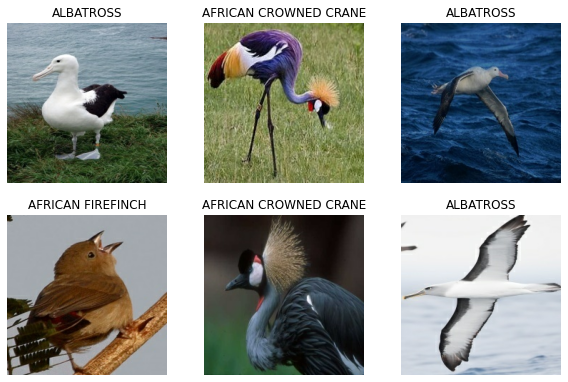

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10)) # Maximum size of the image that is showed in ipynb.
for images, labels in training_dataset.take(1): # Acessing images in the first take.
    for i in range(6):
        ax = plt.subplot(3,3, i + 1) # Max rows. Max columns. Index aka first index is upper left corner position.
        plt.imshow(images[i].numpy().astype("uint8")) # Showing the image i.
        plt.title(class_names[labels[i]])  # Assing title to image i.
        plt.axis("off") # Removing x and y description/numbers.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

number_of_classes = len(class_names)
model = Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=3, input_shape=(224,224,3), activation="relu")) # Makes it a convolutional neural network
model.add(layers.MaxPool2D(pool_size=2))
model.add(layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(layers.MaxPool2D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam", loss = 'binary_crossentropy', metrics=['accuracy'])

model.fit(training_dataset,
          epochs=6)


Epoch 1/6
21/21 [==============================] - 1s 20ms/step - loss: -409.5009 - accuracy: 0.3750
Epoch 2/6
21/21 [==============================] - 0s 14ms/step - loss: -11068.0527 - accuracy: 0.3567

In [64]:
model.summary()



Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 2)       56        
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 111, 111, 2)       0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 24642)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1577152   
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0         
Total params: 1,577,208
Trainable params: 1,577,208
Non-trainable params: 0
_________________________________________________________________
